In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import tensorflow as tf
import pickle
import os

In [2]:
import dataset_utils
from glob import glob

In [3]:
DATA_DIR = "pointnet_data"
NUM_POINTS = 100
NUM_CLASSES = 2
BATCH_SIZE = 32
train_points, test_points, train_labels, test_labels, CLASS_MAP = dataset_utils.parse_dataset(NUM_POINTS, DATA_DIR)

processing class: standing
processing class: sitting


In [4]:
print(train_points)

[[[-6.9727e-01  3.0938e+00  8.3984e-01  3.7573e-01  2.7300e+02]
  [-6.0889e-01  2.7422e+00  8.9062e-01 -6.2598e-01  2.5800e+02]
  [-5.3418e-01  2.6621e+00  1.2812e+00 -3.7573e-01  2.9300e+02]
  ...
  [-7.2168e-01  3.1445e+00  7.2754e-01  3.7573e-01  2.8200e+02]
  [-7.8125e-01  3.2988e+00  9.4727e-01  5.0098e-01  3.1800e+02]
  [-7.2852e-01  3.2578e+00  8.4961e-01  5.0098e-01  3.4000e+02]]

 [[-7.5391e-01  3.3008e+00  7.4805e-01  5.0098e-01  2.9200e+02]
  [-6.3086e-01  2.5078e+00  1.2188e+00 -5.0098e-01  3.1800e+02]
  [-4.7266e-01  2.4512e+00  1.3643e+00 -6.2598e-01  3.2600e+02]
  ...
  [-4.3994e-01  2.5703e+00  9.7266e-01 -2.5049e-01  2.2400e+02]
  [-6.1719e-01  2.5762e+00  8.5059e-01 -3.7573e-01  1.8600e+02]
  [-7.0605e-01  3.2305e+00  4.0918e-01  2.5049e-01  1.9800e+02]]

 [[-9.0918e-01  3.2969e+00  4.6484e-01  5.0098e-01  2.3400e+02]
  [-8.6914e-01  3.1484e+00  4.1504e-01  6.2598e-01  1.9600e+02]
  [-3.5669e-01  2.3105e+00  6.3770e-01 -8.7646e-01  2.9700e+02]
  ...
  [-8.5742e-01  3.

In [5]:
print(test_points)

[[[ 1.4443e+00  3.9375e+00  6.8945e-01 -1.2524e-01  1.1300e+02]
  [ 1.4746e+00  3.9473e+00  5.9082e-01 -2.5049e-01  1.8900e+02]
  [ 1.7158e+00  3.7617e+00  6.5625e-01 -1.2524e-01  1.1300e+02]
  ...
  [ 1.9121e+00  4.0430e+00  6.2109e-01  3.7573e-01  2.4400e+02]
  [ 1.4863e+00  3.7656e+00  1.2695e+00 -2.5049e-01  2.6400e+02]
  [ 1.4053e+00  3.8633e+00  1.0605e+00 -2.5049e-01  3.0900e+02]]

 [[ 1.4375e+00  3.7520e+00  1.2500e+00 -2.5049e-01  3.0700e+02]
  [-3.9941e-01  3.2852e+00  8.0664e-01 -6.2598e-01  3.0700e+02]
  [-5.0879e-01  3.1406e+00  4.0332e-01 -5.0098e-01  2.3100e+02]
  ...
  [-3.1641e-01  3.0938e+00  3.8672e-01 -2.5049e-01  2.5500e+02]
  [-5.5273e-01  3.3691e+00  3.7305e-01 -1.0020e+00  1.6600e+02]
  [ 1.5801e+00  4.0352e+00  6.4648e-01  0.0000e+00  1.2200e+02]]

 [[ 1.4375e+00  3.7520e+00  1.2500e+00 -2.5049e-01  3.0700e+02]
  [-3.9941e-01  3.2852e+00  8.0664e-01 -6.2598e-01  3.0700e+02]
  [ 3.8940e-01  3.5312e+00  9.0820e-01 -5.0098e-01  2.1300e+02]
  ...
  [ 3.8940e-01  3.

In [6]:
train_points = train_points[:, :, :3]
test_points = test_points[:, :, :3]
print(CLASS_MAP)

{0: 'standing', 1: 'sitting'}


In [7]:
print(train_points)

[[[-0.6973   3.094    0.84   ]
  [-0.609    2.742    0.8906 ]
  [-0.534    2.662    1.281  ]
  ...
  [-0.7217   3.145    0.7275 ]
  [-0.7812   3.299    0.9473 ]
  [-0.7285   3.258    0.8496 ]]

 [[-0.754    3.3      0.748  ]
  [-0.631    2.508    1.219  ]
  [-0.4727   2.451    1.364  ]
  ...
  [-0.44     2.57     0.9727 ]
  [-0.617    2.576    0.8506 ]
  [-0.706    3.23     0.4092 ]]

 [[-0.909    3.297    0.4648 ]
  [-0.869    3.148    0.415  ]
  [-0.3567   2.31     0.6377 ]
  ...
  [-0.8574   3.016    0.866  ]
  [-0.754    3.3      0.748  ]
  [-0.884    3.168    0.6367 ]]

 ...

 [[-0.8      1.507    0.6426 ]
  [-0.7305   1.468    0.551  ]
  [-0.6553   1.462    0.4355 ]
  ...
  [-0.8      1.521    0.1445 ]
  [-0.6445   1.709    0.4229 ]
  [-0.8      1.301    0.6357 ]]

 [[-0.8774   1.654    0.3672 ]
  [-0.06494  1.082    0.5303 ]
  [-0.6416   1.677    0.331  ]
  ...
  [-0.669    1.263    0.5557 ]
  [-0.5273   1.419    0.588  ]
  [-0.6636   1.353    0.5156 ]]

 [[-0.7275   1.686    0.

In [8]:
from tensorflow import data as tf_data
import keras
import PointNET

keras.utils.set_random_seed(seed=42)

In [9]:
train_size = 0.8
dataset = tf_data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf_data.Dataset.from_tensor_slices((test_points, test_labels))
train_dataset_size = int(len(dataset) * train_size)

dataset = dataset.shuffle(len(train_points)).map(PointNET.augment)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)

train_dataset = dataset.take(train_dataset_size).batch(BATCH_SIZE)
validation_dataset = dataset.skip(train_dataset_size).batch(BATCH_SIZE)

In [10]:
import keras
import tensorflow as tf
from keras import ops
from keras import layers
from PointNET import tnet, conv_bn, dense_bn

In [11]:
inputs = keras.Input(shape=(NUM_POINTS, 3))

x = tnet(inputs, 3)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100, 3)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 100, 32)   │        128 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 100, 32)   │        128 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 100, 32)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 100, 64)   │      2,112 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 64)   │        256 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 100, 64)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 100, 512)  │     33,280 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 512)  │      2,048 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 100, 512)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ activation_2[0][… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    131,328 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 128)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 9)         │      1,161 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 3, 3)      │          0 │ dense_2[0][0]   

 Total params: 747,947 (2.85 MB)

 Trainable params: 741,867 (2.83 MB)

 Non-trainable params: 6,080 (23.75 KB)

In [12]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy"],
)

model.fit(train_dataset, epochs=20, validation_data=validation_dataset)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 51.2524 - sparse_categorical_accuracy: 0.8457 - val_loss: 31.8799 - val_sparse_categorical_accuracy: 0.9792
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 34.5446 - sparse_categorical_accuracy: 0.9880 - val_loss: 32.6783 - val_sparse_categorical_accuracy: 0.9514
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 34.5011 - sparse_categorical_accuracy: 0.9810 - val_loss: 31.3113 - val_sparse_categorical_accuracy: 0.9861
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 34.2181 - sparse_categorical_accuracy: 0.9966 - val_loss: 31.4499 - val_sparse_categorical_accuracy: 0.9861
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 34.2128 - sparse_categorical_accuracy: 0.9932 - val_loss: 33.2553 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 34.2308 - sparse_categorical_accuracy: 0.9935 - val_loss: 31.3294 - val_sparse_categorical_accuracy: 1.000

In [13]:
from matplotlib import pyplot as plt

2024-08-08 15:46:25.556300: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
[[[ 1.004    3.535    0.461  ]
  [-0.8      0.8115   1.031  ]
  [-0.4219   3.36     0.6816 ]
  ...
  [-0.4644   1.638    1.584  ]
  [ 0.03516  3.32     0.755  ]
  [ 0.6636   3.537    0.454  ]]

 [[ 0.4385   3.062    0.746  ]
  [-0.425    1.515    0.3975 ]
  [ 0.1299   1.955    0.5977 ]
  ...
  [-0.3254   1.626    0.3398 ]
  [-0.718    1.568    0.127  ]
  [-0.8667   1.239    0.4795 ]]

 [[ 0.05908  1.767    0.2988 ]
  [-0.1128   1.651    0.1348 ]
  [-0.2656   1.565    0.4238 ]
  ...
  [-0.8      1.801    0.3809 ]
  [-0.7275   1.517    0.4756 ]
  [-0.5996   1.4      0.619  ]]

 ...

 [[-0.2686   3.207    0.714  ]
  [-0.8      1.134    1.264  ]
  [ 0.4644   3.605    0.9395 ]
  ...
  [ 1.52     3.818    0.742  ]
  [ 1.889    4.03     0.668  ]
  [ 0.955    3.55     1.153  ]]

 [[ 0.268    3.605    1.142  ]
  [-0.489    1.604    0.3447 ]
  [ 0.145    1.747    0.3203 ]
  ...
  [-0.6523   1.364    0.3057 ]
  [-0.5166   1.484    0.5293 ]
  [-0.4727   1.351

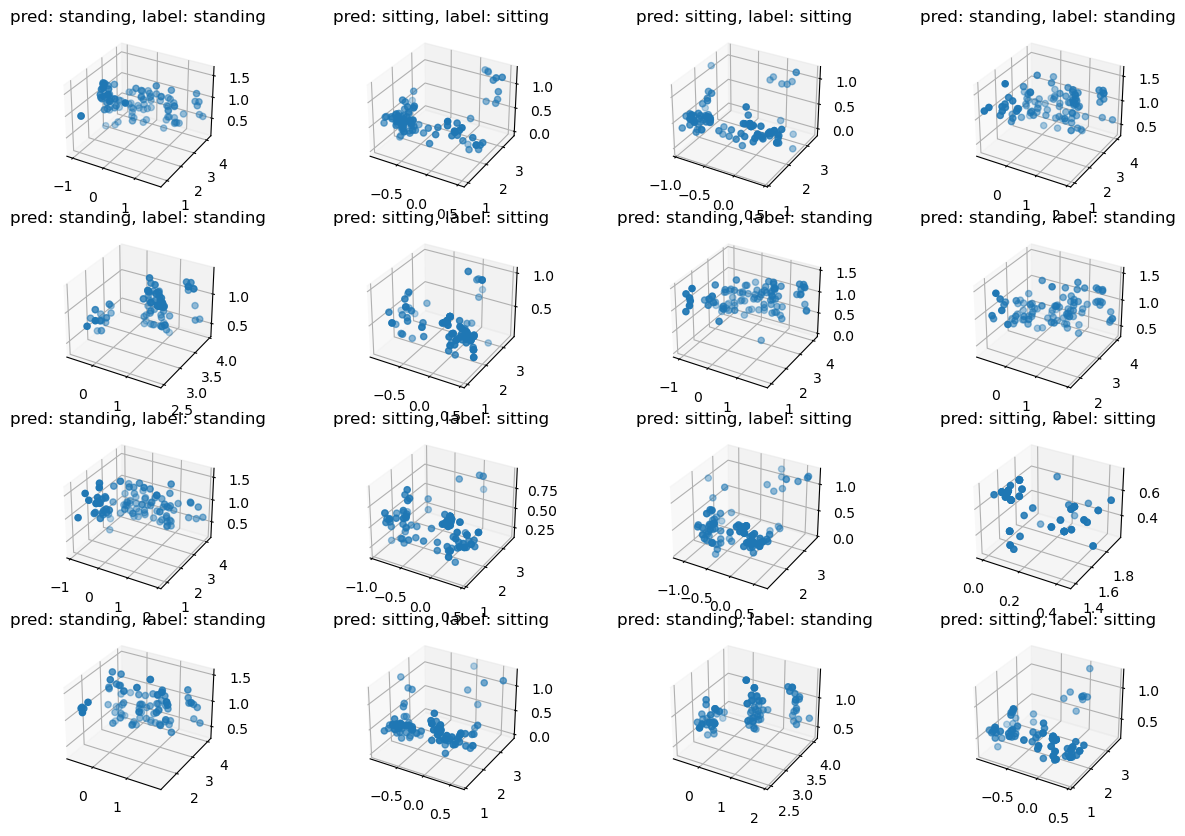

In [14]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:20, ...]
labels = labels[:20, ...]

# run test data through model
preds = model.predict(points)
preds = ops.argmax(preds, -1)

points = points.numpy()
print(points)

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
        )
    )
    ax.set_axis_on()
plt.show()

In [15]:
predictions = []

for batch in np.array_split(test_points, len(test_points)//NUM_POINTS): 
    preds = model.predict(batch)
    preds = np.argmax(preds, axis=-1)
    predictions.extend(preds)

predictions = np.array(predictions)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [16]:
accuracy = np.sum(predictions == test_labels) / len(test_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.45%
